In [133]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from ip2geotools.databases.noncommercial import DbIpCity

In [18]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/gulim.ttc' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

In [2]:
input_file_name = 'C:/Users/Playdata/pytest/contest/main_df.csv'
df = pd.read_csv(input_file_name, encoding= 'utf8')

In [3]:
df.head()

,MAIL_FROM,Received,Date,text_without_tag,include_url,num_of_imgs,Month,Day,Time,length_of_text,main_language,Group,ip
0,juyoung@gmail.com,from [102.48.236.154] by 73.132.221.32 id <954...,"Mon, 16 Dec 2019 21:41:42 +0100",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,Dec,Mon,21.0,533.0,ko,A,102.48.236.154
1,suminy@outlook.kr,from [167.139.250.4] by 73.132.221.32 with ESM...,"Mon, 20 Apr 2020 22:38:31 -0200",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,Apr,Mon,22.0,509.0,ko,A,167.139.250.4
2,jisun@nate.com,from [211.204.37.3] by 73.132.221.32 with ESMT...,"Mon, 03 Feb 2020 11:41:18 -0600",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,Feb,Mon,11.0,527.0,ko,B,211.204.37.3
3,yenjuy@outlook.kr,from [208.206.157.152] by 73.132.221.32 with E...,"Sun, 05 Apr 2020 22:39:19 +0300",Content-Type: text/html;\nContent-Transfer-Enc...,0,0,Apr,Sun,22.0,217.0,ko,A,208.206.157.152
4,noah@ajne.com,from localhost ([127.0.0.1]) by localhost via ...,"Tue, 21 Apr 2020 17:52:56 +0800",This message contained an attachment that was ...,0,0,Apr,Tue,17.0,210.0,en,D,127.0.0.1


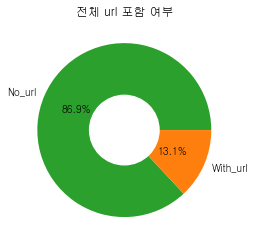

In [85]:
# include_url
url_counter = Counter(df['include_url'])
plt.pie(url_counter.values(), autopct='%1.1f%%', colors = ['tab:green', 'tab:orange'], labels=['No_url', 'With_url'])

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('전체 url 포함 여부')
plt.savefig('total_data_graph/total_url.png', dpi=300)

In [53]:
# number of imgs

img_counter = Counter(df['num_of_imgs'])
img_counter2 = {}
img_counter2['with_img'] = 0
for i in sorted(img_counter.keys()):
    if i ==0 :
        img_counter2['without_img'] = img_counter[i]
    else:
        img_counter2['with_img'] += img_counter[i]
    


In [69]:
img_counter3 = {}
img_counter3['over_5'] = 0
for i in sorted(img_counter.keys()):
    if i >0 and i <5 :
        img_counter3[i] = img_counter[i]
    elif i >=5: 
        img_counter3['over_5'] += img_counter[i]

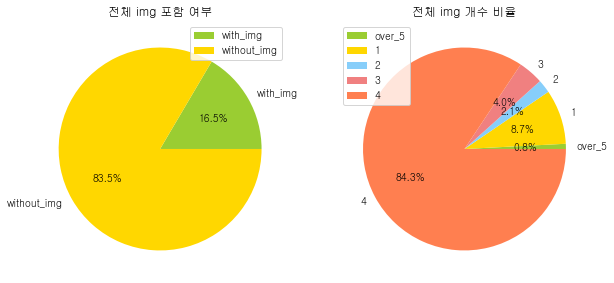

In [84]:
color = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'coral', 'orchid']

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(img_counter2.values(), autopct='%1.1f%%', colors = color, labels=img_counter2.keys())
ax1.legend(img_counter2.keys())
ax1.set_title('전체 img 포함 여부')

ax2.pie(img_counter3.values(), autopct='%1.1f%%', colors = color, labels=img_counter3.keys())
ax2.legend(img_counter3.keys())
ax2.set_title('전체 img 개수 비율')

plt.savefig('total_data_graph/total_img.png', dpi=300)

In [81]:
# 월별 그래프
month_counter = Counter(df['Month'])

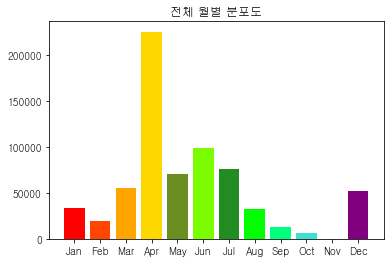

In [86]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', "Dec"]
color= ['red', 'orangered', 'orange', 'gold', 'olivedrab', 'lawngreen', 'forestgreen', 'lime', 'springgreen', 
           'turquoise', 'slateblue', 'purple']
plt.bar(Months, [month_counter[i] for i in Months ] , color= color)
plt.title('전체 월별 분포도')
plt.savefig('total_data_graph/total_month.png', dpi=300)

In [87]:
# 요일별 그래프
day_counter = Counter(df['Day'])

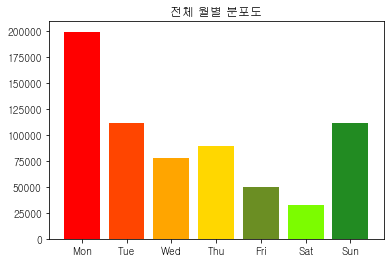

In [94]:
Days = ['Mon', 'Tue' , 'Wed' , 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar(Days, [day_counter[i] for i in Days ] , color= color)
plt.title('전체 월별 분포도')
plt.savefig('total_data_graph/total_month.png', dpi=300)

In [99]:
# 시가별 그래프
time_counter = Counter(df['Time'].dropna())
time_counter1 = {}
for i in sorted(time_counter.keys()):
    if int(i) < 24:
        time_counter1[int(i)] = time_counter[i]
    else:
        time_counter1[int(i)-24] += time_counter[i]

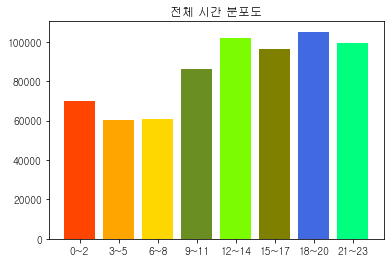

In [117]:
Time_range = ['0~2','3~5','6~8', '9~11', '12~14','15~17' , '18~20' , '21~23' ]
color= ['orangered', 'orange', 'gold', 'olivedrab', 'lawngreen', 'olive', 'royalblue', 'springgreen']
plt.bar(Time_range, [time_counter1[i] + time_counter1[i+1] + time_counter1[i+2] for i in range(0,24,3) ] , color= color)
plt.title('전체 시간 분포도')
plt.savefig('total_data_graph/total_time.png', dpi=300)

In [123]:
# 언어 그래프
lan_counter = Counter(df['main_language'].dropna())
languages = ['ko', 'en', 'de', 'ja']
lan_counter1 = {}
lan_counter1['others'] = 0

for i in lan_counter.keys():
    if i in languages:
        lan_counter1[i] = lan_counter[i]
    else:
        lan_counter1['others'] += lan_counter[i]

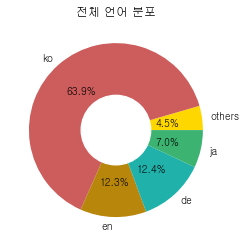

In [128]:
color = ['gold' , 'indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']
plt.pie(lan_counter1.values(), autopct='%1.1f%%', colors = color, labels=lan_counter1.keys())

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('전체 언어 분포')
plt.savefig('total_data_graph/total_language.png', dpi=300)

In [135]:
# 국가 그래프
ip_counter = Counter(df['ip'].dropna())
ip_over_100 = [ i for i in ip_counter.items() if i[1]>=100 ]

In [136]:
ip_country = {}
for i in ip_over_100:
    try:
        response = DbIpCity.get(i[0], api_key='free')
        country = response.country
        if country in ip_country.keys():
            ip_country[country] += i[1]
        else:
            ip_country[country] = i[1]
    except:
        pass

{}
{}
{'HK': 1309}
{'HK': 2514}
{'HK': 3507}
{'HK': 5023}
{'HK': 5023, 'US': 850}
{'HK': 5023, 'US': 2134}
{'HK': 5023, 'US': 2904}
{'HK': 5319, 'US': 2904}
{'HK': 5319, 'US': 4025}
{'HK': 5436, 'US': 4025}
{'HK': 7777, 'US': 4025}
{'HK': 7777, 'US': 5366}
{'HK': 7777, 'US': 5366}
{'HK': 7777, 'US': 5366, 'BR': 158}
{'HK': 8199, 'US': 5366, 'BR': 158}
{'HK': 8199, 'US': 5612, 'BR': 158}
{'HK': 8199, 'US': 5612, 'BR': 536}
{'HK': 8199, 'US': 5612, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 5735, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 5859, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 5859, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 6004, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 6481, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 6587, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 7615, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 7803, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 8013, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 8195, 'BR': 536, 'NL': 113}
{'HK': 8199, 'US': 8382, 'BR': 536, 'NL': 113}
{'HK': 819

{'HK': 10473, 'US': 19049, 'BR': 2681, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19215, 'BR': 2681, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19326, 'BR': 2681, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19658, 'BR': 2681, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19658, 'BR': 2945, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19658, 'BR': 3093, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19658, 'BR': 3234, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19760, 'BR': 3234, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19760, 'BR': 3234, 'NL': 331, 'RU': 115, 'DE': 109, 'GB': 423, 'IN': 131, 'JP': 264}
{'HK': 10473, 'US': 19867, 'BR': 3234, 'NL': 331, 'RU':

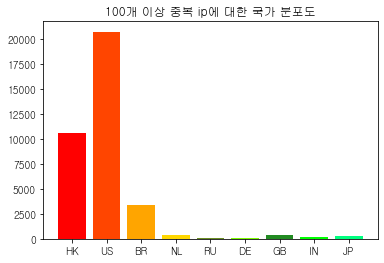

In [142]:
color= ['red', 'orangered', 'orange', 'gold', 'olivedrab', 'lawngreen', 'forestgreen', 'lime', 'springgreen', 
           'turquoise', 'slateblue', 'purple']
plt.bar(ip_country.keys(),ip_country.values(), color= color)
plt.title('100개 이상 중복 ip에 대한 국가 분포도')
plt.savefig('total_data_graph/country.png', dpi=300)

In [151]:
# 그룹별
id_counter = Counter(df['Group'].dropna())
list(id_counter.items())

[('A', 309510), ('B', 101816), ('D', 207789), ('C', 60705)]

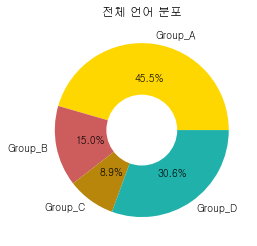

In [157]:
color = ['gold' , 'indianred', 'darkgoldenrod', 'lightseagreen', 'mediumseagreen']
plt.pie( [ i[1] for i in sorted(list(id_counter.items()) , key= lambda x:x[0]) ], autopct='%1.1f%%',
        colors = color, labels= ['Group_A', 'Group_B', 'Group_C', 'Group_D'])

centre_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('전체 언어 분포')
plt.savefig('total_data_graph/total_group.png', dpi=300)